# Juice Check

Looking at Nate Silver's NBA betting performance and how much of it was lost to the juice. Juice is another name for the sportsbook's take of the wagers. The average juice is 4.5% on all money wagered, but it is taken from the winner and not the loser so it is expressed as a 9% take of the winnings. This is quite a gut check to new bettors and makes it quite hard to make money over time.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

## Constants

On Nate's Risky Business podcast (https://omny.fm/shows/risky-business/lessons-from-the-river-maria-interviews-nate-about) he gave some estimates of his sports betting journey. 

Overall he wagered $1.8 million to win $5,000 and had a unit size of about $1,200. Which means Nate placed roughly 1500 bets over the course of the 2023 NBA season. He is truly our degenerate king. 

Because we do not know what kind of bets he made we will paramaterize the juice between 2 and 7 percent, the common range for straight bets. 

In [2]:
# Constants
TOTAL_WAGERED = 1800000  # Total amount wagered (betting volume)
OVERALL_PROFIT = 5000  # Total amount won overall
BET_AMOUNT = 1200  # Amount of each bet
NUM_BETS = TOTAL_WAGERED / BET_AMOUNT  # 1500 bets made
LOSE_AMOUNT = -BET_AMOUNT  # Amount lost on each wager
# Create a range of juice values
JUICE_RANGE = np.linspace(0.86, 0.94, 100)  # juice is taken from the winner so we are doubling the values and subtracting it from winnings

## Calculating Win Rate

Given these constants here's a function to find Nate's win rate. Given that he made a profit we know its better than 50% but the exact rate is determined by how much the books took. 

In [3]:
# Function to calculate win rate given juice (assuming $5000 profit)
def calculate_win_rate(juice):
    win_amount = BET_AMOUNT * juice
    num_wins = (OVERALL_PROFIT - (NUM_BETS * LOSE_AMOUNT)) / (win_amount - LOSE_AMOUNT)
    win_rate = (num_wins / NUM_BETS) * 100
    return win_rate

## Winning Rates

While we calculate for the whole range lets just look at some key points. At the average juice for straight bets Nate would have had to have a 52.5% win rate for him to secure his $5000 profit

In [4]:
# Calculate win rates for each juice value
win_rates = [calculate_win_rate(juice) for juice in JUICE_RANGE]

# Print some key points for reference
print("Key Points in the Range:")
print(f"Win Rate at 7% Juice: {calculate_win_rate(0.86):.2f}%")
print(f"Win Rate at 4.5% Juice: {calculate_win_rate(0.91):.8f}%")
print(f"Win Rate at 2% Juice: {calculate_win_rate(0.96):.2f}%")

Key Points in the Range:
Win Rate at 7% Juice: 53.91%
Win Rate at 4.5% Juice: 52.50145433%
Win Rate at 2% Juice: 51.16%


## Finding Profit Range with Less Juice

After finding Nate's rate at winning bets we use that so how much money he would have actually made if the sportsbooks didn't juice him so hard. 

In [5]:
# Calculate profit given win rate and juice
def calculate_profit(win_rate, juice):
    win_amount = BET_AMOUNT * (juice)
    num_wins = NUM_BETS * (win_rate / 100 )
    profit = (num_wins * win_amount) + ((NUM_BETS - num_wins) * LOSE_AMOUNT)
    return profit

## Profits

If we assume the 52.5% winning we see that Nate would have won $90k if there were no sportsbooks fees whatsover, meaning he lost $85k to the sportsbooks. Absolutely brutal. 

In [6]:
# Calculate profits for the same win rate array but with 0%, 0.5%, and 4.5% juice
profits_no_juice = [calculate_profit(win_rate, 1) for win_rate in win_rates]
profits_half_percent = [calculate_profit(win_rate, 0.995) for win_rate in win_rates]
profits_four_half_percent = [calculate_profit(win_rate, 0.91) for win_rate in win_rates]

print("Key Profit points:")
print(f"Profit at 52.5% win rate and no Juice: {calculate_profit(52.501, 1):.2f}")
print(f"Profit at 52.5% win rate and .5% Juice: {calculate_profit(52.501, .995):.2f}")

print(f"Winning lost to the juice: {calculate_profit(52.501, 1)-OVERALL_PROFIT:.2f}")

Key Profit points:
Profit at 52.5% win rate and no Juice: 90036.00
Profit at 52.5% win rate and .5% Juice: 85310.91
Winning lost to the juice: 85036.00


## Plots

Any improvement in winning corresponds to a massive change in profits. 

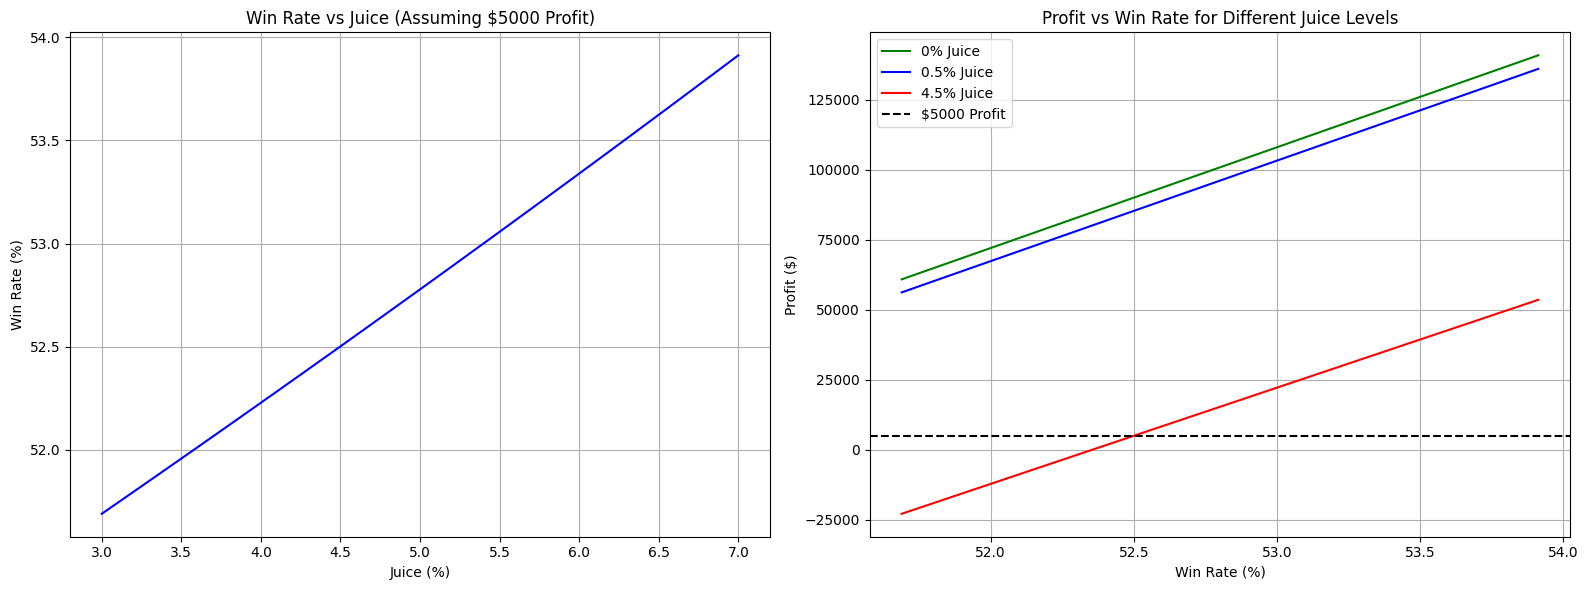

In [7]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Win Rate vs Juice
ax1.plot((1-JUICE_RANGE) * 100 * 0.5, win_rates, color='blue')
ax1.set_xlabel('Juice (%)')
ax1.set_ylabel('Win Rate (%)')
ax1.set_title('Win Rate vs Juice (Assuming $5000 Profit)')
ax1.grid(True)

# Plot 2: Profit vs Win Rate for different juice levels
ax2.plot(win_rates, profits_no_juice, color='green', label='0% Juice')
ax2.plot(win_rates, profits_half_percent, color='blue', label='0.5% Juice')
ax2.plot(win_rates, profits_four_half_percent, color='red', label='4.5% Juice')
ax2.set_xlabel('Win Rate (%)')
ax2.set_ylabel('Profit ($)')
ax2.set_title('Profit vs Win Rate for Different Juice Levels')
ax2.grid(True)
ax2.legend()

# Add horizontal line at y=5000 for reference
ax2.axhline(y=5000, color='black', linestyle='--', label='$5000 Profit')
ax2.legend()

plt.tight_layout()
plt.show()